In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# Data Loading

In [2]:
    # Importing all data files
games = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/games.csv")
players = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/players.csv")
plays = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/plays.csv")
tackles = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/tackles.csv")
week1 = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/tracking_week_1.csv")
week2 = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/tracking_week_2.csv")
week3 = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/tracking_week_3.csv")
week4 = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/tracking_week_4.csv")
week5 = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/tracking_week_5.csv")
week6 = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/tracking_week_6.csv")
week7 = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/tracking_week_7.csv")
week8 = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/tracking_week_8.csv")
week9 = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/tracking_week_9.csv")

# Exploring Week 2 Data

We will be focusing on week 2 data, because it is one of the training data with the least amount of data missing.

In [5]:
week2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371600 entries, 0 to 1371599
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1371600 non-null  int64  
 1   playId         1371600 non-null  int64  
 2   nflId          1311904 non-null  float64
 3   displayName    1371600 non-null  object 
 4   frameId        1371600 non-null  int64  
 5   time           1371600 non-null  object 
 6   jerseyNumber   1311904 non-null  float64
 7   club           1371600 non-null  object 
 8   playDirection  1371600 non-null  object 
 9   x              1371600 non-null  float64
 10  y              1371600 non-null  float64
 11  s              1371600 non-null  float64
 12  a              1371600 non-null  float64
 13  dis            1371600 non-null  float64
 14  o              1311994 non-null  float64
 15  dir            1311994 non-null  float64
 16  event          125477 non-null   object 
dtypes: float

week2 has some missing data

In [6]:
missingweek2 = pd.concat([week2.isnull().sum(), 100 * week2.isnull().mean()], axis = 1)
missingweek2.columns = ['count', '%']
missingweek2.sort_values(by = 'count', ascending = False)

,count,%
event,1246123,90.851779
nflId,59696,4.352289
jerseyNumber,59696,4.352289
dir,59606,4.345728
o,59606,4.345728
y,0,0.000000
dis,0,0.000000
a,0,0.000000
s,0,0.000000
gameId,0,0.000000


In [7]:
week2.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091500,55,40011.0,Travis Kelce,1,2022-09-15 20:16:32.700000,87.0,KC,left,87.2,24.9,0.00,0.00,0.0,263.11,138.55,NaN
1,2022091500,55,40011.0,Travis Kelce,2,2022-09-15 20:16:32.799999,87.0,KC,left,87.2,24.9,0.00,0.00,0.0,263.11,142.54,NaN
2,2022091500,55,40011.0,Travis Kelce,3,2022-09-15 20:16:32.900000,87.0,KC,left,87.2,24.9,0.00,0.00,0.0,262.47,143.82,NaN
3,2022091500,55,40011.0,Travis Kelce,4,2022-09-15 20:16:33.000000,87.0,KC,left,87.2,24.9,0.00,0.00,0.0,262.47,149.71,NaN
4,2022091500,55,40011.0,Travis Kelce,5,2022-09-15 20:16:33.099999,87.0,KC,left,87.2,24.9,0.01,0.15,0.0,262.47,309.38,NaN


# Exploring Game dataset

In [8]:
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23


In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gameId             136 non-null    int64 
 1   season             136 non-null    int64 
 2   week               136 non-null    int64 
 3   gameDate           136 non-null    object
 4   gameTimeEastern    136 non-null    object
 5   homeTeamAbbr       136 non-null    object
 6   visitorTeamAbbr    136 non-null    object
 7   homeFinalScore     136 non-null    int64 
 8   visitorFinalScore  136 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 9.7+ KB


This dataset has no missing data

In [10]:
games[games['week']== 2]

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
16,2022091500,2022,2,09/15/2022,20:15:00,KC,LAC,27,24
17,2022091800,2022,2,09/18/2022,13:00:00,BAL,MIA,38,42
18,2022091801,2022,2,09/18/2022,13:00:00,CLE,NYJ,30,31
19,2022091802,2022,2,09/18/2022,13:00:00,DET,WAS,36,27
20,2022091803,2022,2,09/18/2022,13:00:00,JAX,IND,24,0
21,2022091804,2022,2,09/18/2022,13:00:00,NO,TB,10,20
22,2022091805,2022,2,09/18/2022,13:00:00,NYG,CAR,19,16
23,2022091806,2022,2,09/18/2022,13:00:00,PIT,NE,14,17
24,2022091807,2022,2,09/18/2022,16:05:00,LA,ATL,31,27
25,2022091808,2022,2,09/18/2022,16:05:00,SF,SEA,27,7


Looking at this we see our team of interest, the Baltimore Ravens (BAL) unique gameId and the score of the game. they are also the home team.

# Exploring Players dataset

In [11]:
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [12]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1683 non-null   int64 
 1   height       1683 non-null   object
 2   weight       1683 non-null   int64 
 3   birthDate    1204 non-null   object
 4   collegeName  1683 non-null   object
 5   position     1683 non-null   object
 6   displayName  1683 non-null   object
dtypes: int64(2), object(5)
memory usage: 92.2+ KB


In [13]:
missingplayers = pd.concat([players.isnull().sum(), 100 * players.isnull().mean()], axis = 1)
missingplayers.columns = ['count', '%']
missingplayers.sort_values(by = 'count', ascending = False)

,count,%
birthDate,479,28.461081
nflId,0,0.000000
height,0,0.000000
weight,0,0.000000
collegeName,0,0.000000
position,0,0.000000
displayName,0,0.000000


This data set has missing data in the birthDate category which accounts for 28% of the data

# Exploring Plays dataset

In [14]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12486 entries, 0 to 12485
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gameId                            12486 non-null  int64  
 1   playId                            12486 non-null  int64  
 2   ballCarrierId                     12486 non-null  int64  
 3   ballCarrierDisplayName            12486 non-null  object 
 4   playDescription                   12486 non-null  object 
 5   quarter                           12486 non-null  int64  
 6   down                              12486 non-null  int64  
 7   yardsToGo                         12486 non-null  int64  
 8   possessionTeam                    12486 non-null  object 
 9   defensiveTeam                     12486 non-null  object 
 10  yardlineSide                      12319 non-null  object 
 11  yardlineNumber                    12486 non-null  int64  
 12  game

In [15]:
plays.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


This dataset has a couple of missing data, but we will leave it in for now.

In [16]:
missingplays = pd.concat([plays.isnull().sum(), 100 * plays.isnull().mean()], axis = 1)
missingplays.columns = ['count', '%']
missingplays.sort_values(by = 'count', ascending = False)

,count,%
foulNFLId2,12461,99.799776
foulName2,12461,99.799776
foulName1,11894,95.258690
foulNFLId1,11894,95.258690
penaltyYards,11871,95.074483
passLength,6852,54.877463
passResult,6381,51.105238
passProbability,337,2.699023
yardlineSide,167,1.337498
defendersInTheBox,5,0.040045


# Exploring tackles dataset

In [17]:
tackles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17426 entries, 0 to 17425
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gameId            17426 non-null  int64
 1   playId            17426 non-null  int64
 2   nflId             17426 non-null  int64
 3   tackle            17426 non-null  int64
 4   assist            17426 non-null  int64
 5   forcedFumble      17426 non-null  int64
 6   pff_missedTackle  17426 non-null  int64
dtypes: int64(7)
memory usage: 953.1 KB


In [18]:
tackles.head()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0


There is no missing data in this dataset.

# Looking more in depth on week2 

In [19]:
week2['displayName'].value_counts()

football           59696
Wyatt Teller        2824
Lamarcus Joyner     2824
Joel Bitonio        2824
Ethan Pocic         2824
                   ...  
Dyami Brown           20
Taylor Lewan          20
Keanu Neal            13
Jackson Barton        13
Colby Gossett         13
Name: displayName, Length: 1138, dtype: int64

In [20]:
week2[week2['displayName'] == 'football']

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
1144,2022091500,55,NaN,football,1,2022-09-15 20:16:32.700000,NaN,football,left,85.199997,29.67,0.00,0.00,0.00,NaN,NaN,NaN
1145,2022091500,55,NaN,football,2,2022-09-15 20:16:32.799999,NaN,football,left,85.199997,29.67,0.00,0.00,0.00,NaN,NaN,NaN
1146,2022091500,55,NaN,football,3,2022-09-15 20:16:32.900000,NaN,football,left,85.199997,29.67,0.00,0.00,0.00,NaN,NaN,NaN
1147,2022091500,55,NaN,football,4,2022-09-15 20:16:33.000000,NaN,football,left,85.199997,29.67,0.00,0.00,0.00,NaN,NaN,NaN
1148,2022091500,55,NaN,football,5,2022-09-15 20:16:33.099999,NaN,football,left,85.040001,29.76,5.46,0.06,0.18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371595,2022091901,3976,NaN,football,24,2022-09-19 23:18:48.599999,NaN,football,left,21.490000,15.01,1.24,1.34,0.11,NaN,NaN,tackle
1371596,2022091901,3976,NaN,football,25,2022-09-19 23:18:48.700000,NaN,football,left,21.549999,14.92,1.15,1.28,0.11,NaN,NaN,NaN
1371597,2022091901,3976,NaN,football,26,2022-09-19 23:18:48.799999,NaN,football,left,21.610001,14.84,0.95,1.38,0.10,NaN,NaN,NaN
1371598,2022091901,3976,NaN,football,27,2022-09-19 23:18:48.900000,NaN,football,left,21.650000,14.78,0.72,1.61,0.07,NaN,NaN,NaN


Looks like 'football' was labled in this dataset, we will keep it for now since it might be of use

In [21]:
week2['club'].value_counts()

football    59696
NYJ         51909
CLE         51909
ARI         48983
LV          48983
CHI         45881
GB          45881
PHI         43175
MIN         43175
LA          42548
CAR         42548
NYG         42548
ATL         42548
MIA         42438
BAL         42438
HOU         40953
DEN         40953
KC          39391
LAC         39391
DET         39160
WAS         39160
NE          38863
PIT         38863
DAL         38522
CIN         38522
JAX         38159
IND         38159
BUF         37686
TEN         37686
TB          36124
NO          36124
SF          29612
SEA         29612
Name: club, dtype: int64

There seems to be a good amount of data for BAL

 # Merging Datasets

In [22]:
dataset = week2.merge(players, on = ['nflId', 'displayName'], how = 'outer').merge(games, on = 'gameId' , how = 'outer').merge(tackles, on = ['gameId', 'nflId', 'playId'] , how = 'outer').merge(plays, left_on = ['gameId', 'playId', 'nflId'], right_on = ['gameId', 'playId', 'ballCarrierId'] , how = 'inner')

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59632 entries, 0 to 59631
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gameId                            59632 non-null  float64
 1   playId                            59632 non-null  float64
 2   nflId                             59632 non-null  float64
 3   displayName                       59632 non-null  object 
 4   frameId                           59632 non-null  float64
 5   time                              59632 non-null  object 
 6   jerseyNumber                      59632 non-null  float64
 7   club                              59632 non-null  object 
 8   playDirection                     59632 non-null  object 
 9   x                                 59632 non-null  float64
 10  y                                 59632 non-null  float64
 11  s                                 59632 non-null  float64
 12  a   

There seems to be a lot of missing data for some of the categories, we will take a closer look at a later stage.

In [29]:
dataset.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2.022092e+09,171.0,40011.0,Travis Kelce,1.0,2022-09-15 20:19:34.799999,87.0,KC,left,52.40,...,0.73957,0.26043,0.000172,-0.000172,2.543797,-0.02545,NaN,NaN,NaN,NaN
1,2.022092e+09,171.0,40011.0,Travis Kelce,2.0,2022-09-15 20:19:34.900000,87.0,KC,left,52.38,...,0.73957,0.26043,0.000172,-0.000172,2.543797,-0.02545,NaN,NaN,NaN,NaN
2,2.022092e+09,171.0,40011.0,Travis Kelce,3.0,2022-09-15 20:19:35.000000,87.0,KC,left,52.37,...,0.73957,0.26043,0.000172,-0.000172,2.543797,-0.02545,NaN,NaN,NaN,NaN
3,2.022092e+09,171.0,40011.0,Travis Kelce,4.0,2022-09-15 20:19:35.099999,87.0,KC,left,52.35,...,0.73957,0.26043,0.000172,-0.000172,2.543797,-0.02545,NaN,NaN,NaN,NaN
4,2.022092e+09,171.0,40011.0,Travis Kelce,5.0,2022-09-15 20:19:35.200000,87.0,KC,left,52.34,...,0.73957,0.26043,0.000172,-0.000172,2.543797,-0.02545,NaN,NaN,NaN,NaN


# check random row and for duplicates

In [59]:
dataset.iloc[900]

gameId                          2022091500.0
playId                                3350.0
nflId                                52440.0
displayName            Clyde Edwards-Helaire
frameId                                  8.0
                               ...          
expectedPointsAdded                 1.174917
foulName1                                NaN
foulName2                                NaN
foulNFLId1                               NaN
foulNFLId2                               NaN
Name: 900, Length: 67, dtype: object

In [63]:
dataset_dup = dataset.duplicated()

In [69]:
dataset_dup[dataset_dup == True].count()

0

The dataset looks like it was merfed properly, and is ready to be used and explored. The missing data will not be removed as of right now since we are still looking to nsee if they are important to our model.

### Number of distinct plays and team

In [32]:
dataset[['playId', 'club']].nunique #check one club with playid to see if there are duplicates to see if it is making sense

<bound method DataFrame.nunique of        playId club
0       171.0   KC
1       171.0   KC
2       171.0   KC
3       171.0   KC
4       171.0   KC
...       ...  ...
59627  3976.0  MIN
59628  3976.0  MIN
59629  3976.0  MIN
59630  3976.0  MIN
59631  3976.0  MIN

[59632 rows x 2 columns]>

### Distribution of plays by team

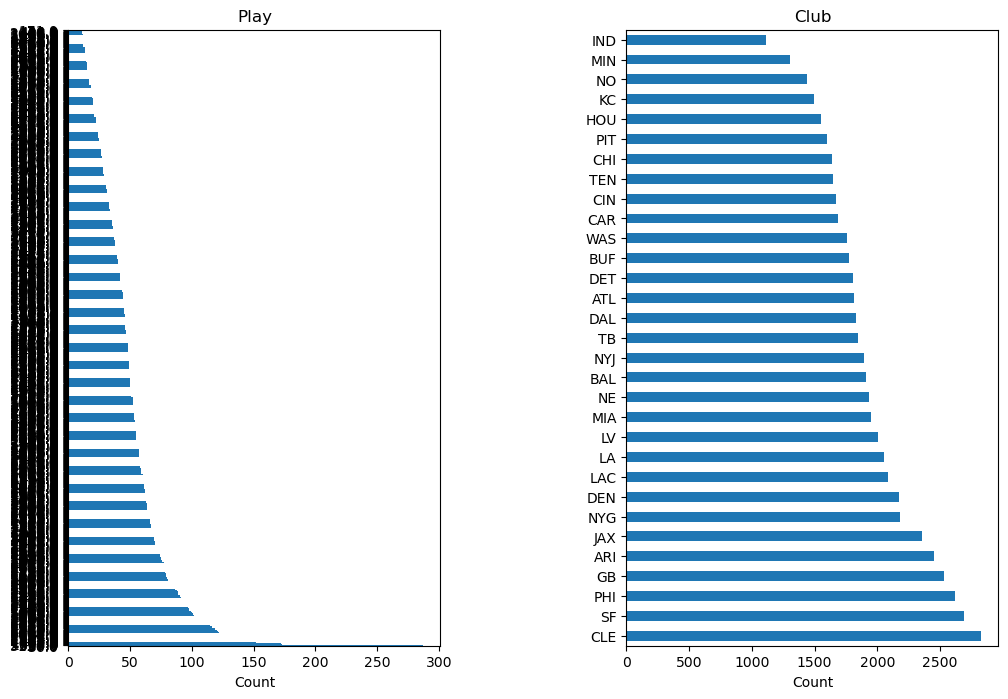

In [33]:
fig, ax = plt.subplots(1,2, figsize = ((12,8)))
dataset.playId.value_counts().plot(kind = 'barh', ax = ax[0])
ax[0].set_title('Play')
ax[0].set_xlabel('Count')

dataset.club.value_counts().plot(kind = 'barh', ax = ax[1])
ax[1].set_title('Club')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace = .5);

The graph on the left shows that some plays are used more than others. The graph on clubs is more symmetric than the graph on plays.

### Yards to go by club

In [34]:
yardstogo_club_mean = dataset.groupby('club')['yardsToGo'].mean()
yardstogo_club_mean.sort_values(ascending = True)

club
BAL    6.527807
LAC    6.702495
KC     7.376086
LA     7.517275
SF     7.665305
HOU    7.712258
ATL    7.927744
ARI    7.978776
PIT    8.050752
TEN    8.373939
JAX    8.379354
BUF    8.387950
DET    8.442596
WAS    8.498008
NYG    8.567369
PHI    8.587405
MIN    8.589272
MIA    8.612705
DAL    8.614543
NYJ    8.674934
TB     8.813413
CAR    8.836299
NE     8.843056
NO     8.878049
LV     9.039441
DEN    9.040037
GB     9.063266
CLE    9.086756
CIN    9.176330
CHI    9.799635
IND    9.909417
Name: yardsToGo, dtype: float64

BAL is at the top, which is good because on average they are close to the end zone by about 6 yards.

In [35]:
yardstogo_club_mean.dtypes

dtype('float64')

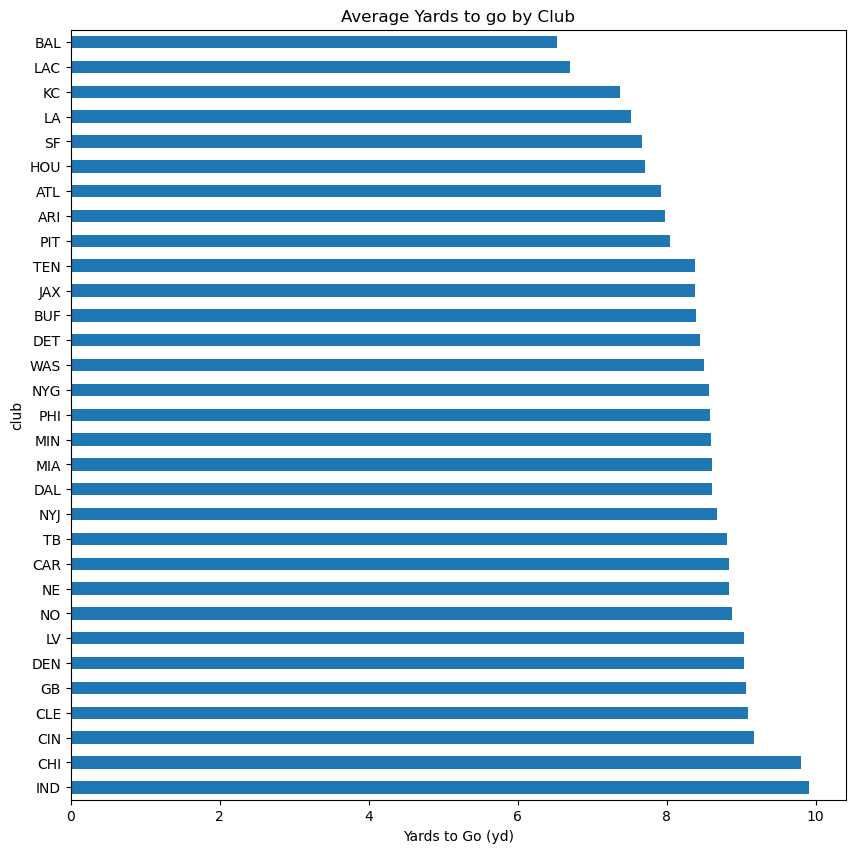

In [36]:
yardstogo_club_mean.sort_values(ascending=False).plot(kind='barh', figsize=(10, 10), title='Average Yards to go by Club')
plt.xlabel('Yards to Go (yd)');

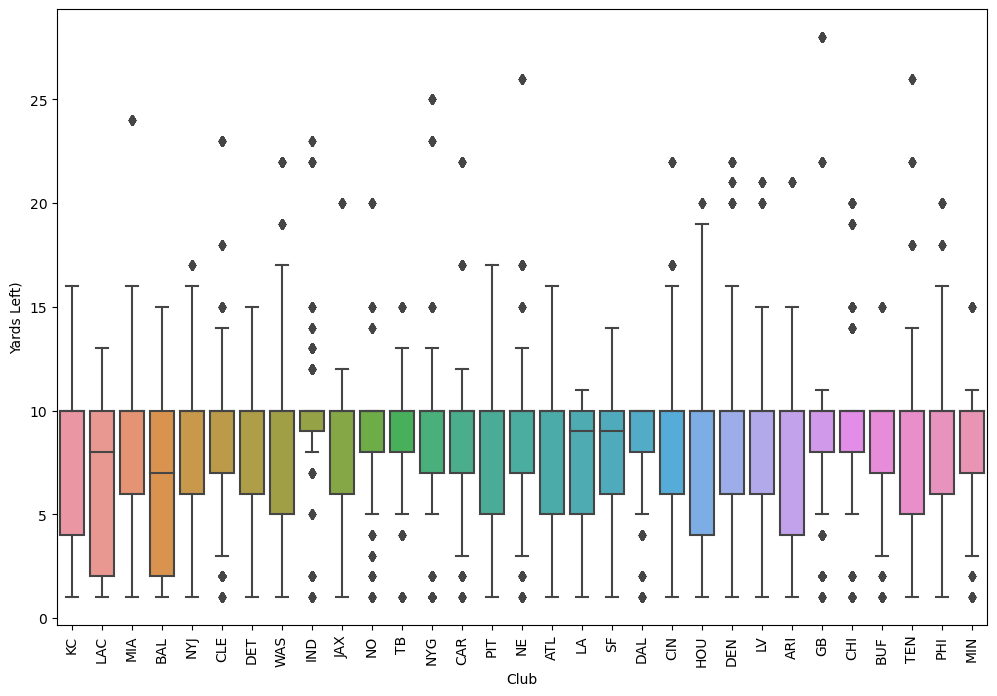

In [37]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='club', y='yardsToGo', data=dataset)
plt.xticks(rotation='vertical')
plt.ylabel('Yards Left)')
plt.xlabel('Club');

The higer end outliers tell you that that team might create more fouls.

In [39]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
gameId,59632.0,2.022092e+09,81.803739,2.022092e+09,2.022092e+09,2.022092e+09,2.022092e+09,2.022092e+09
playId,59632.0,1.962595e+03,1176.476119,5.500000e+01,9.050000e+02,2.021000e+03,2.970000e+03,4.519000e+03
nflId,59632.0,4.822190e+04,4538.667360,2.985100e+04,4.488100e+04,4.781900e+04,5.273300e+04,5.490500e+04
frameId,59632.0,2.564175e+01,17.940866,1.000000e+00,1.100000e+01,2.300000e+01,3.700000e+01,1.260000e+02
jerseyNumber,59632.0,2.710741e+01,21.495233,1.000000e+00,1.400000e+01,2.500000e+01,3.100000e+01,8.900000e+01
x,59632.0,6.120019e+01,24.072369,5.290000e+00,4.236000e+01,6.118000e+01,8.015000e+01,1.205100e+02
y,59632.0,2.679057e+01,11.546328,-3.630000e+00,2.110000e+01,2.701000e+01,3.242000e+01,5.876000e+01
s,59632.0,3.708456e+00,2.527132,0.000000e+00,1.540000e+00,3.670000e+00,5.600000e+00,1.050000e+01
a,59632.0,2.457749e+00,1.524187,0.000000e+00,1.320000e+00,2.400000e+00,3.490000e+00,1.199000e+01
dis,59632.0,3.732543e-01,0.255081,0.000000e+00,1.600000e-01,3.700000e-01,5.600000e-01,2.430000e+00


We want to have this in normalized form

In [40]:
np.log(dataset.describe().T)

/Users/cyn/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/cyn/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,count,mean,std,min,25%,50%,75%,max
gameId,10.995948,21.427398,4.404323,21.427398,21.427398,21.427398,21.427398,21.427398
playId,10.995948,7.582023,7.070279,4.007333,6.807935,7.611348,7.996317,8.416046
nflId,10.995948,10.783569,8.420389,10.303974,10.711770,10.775178,10.872997,10.913360
frameId,10.995948,3.244222,2.887081,0.000000,2.397895,3.135494,3.610918,4.836282
jerseyNumber,10.995948,3.299807,3.067831,0.000000,2.639057,3.218876,3.433987,4.488636
x,10.995948,4.114150,3.181065,1.665818,3.746205,4.113820,4.383900,4.791733
y,10.995948,3.288050,2.446367,NaN,3.049273,3.296207,3.478776,4.073461
s,10.995948,1.310615,0.927085,-inf,0.431782,1.300192,1.722767,2.351375
a,10.995948,0.899246,0.421461,-inf,0.277632,0.875469,1.249902,2.484073
dis,10.995948,-0.985495,-1.366175,-inf,-1.832581,-0.994252,-0.579818,0.887891


There seems to be a lot of columns that have missing values as shown by various 'NaN' in our data.

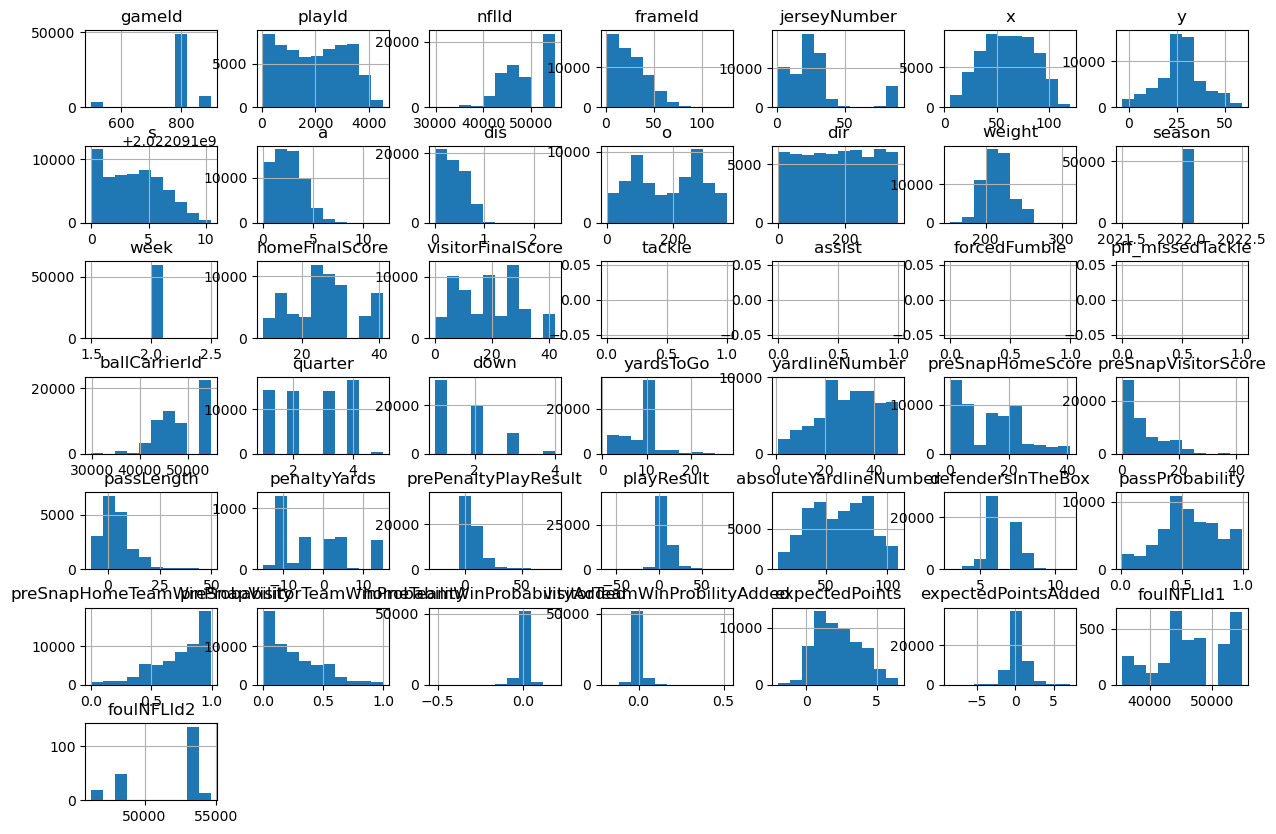

In [41]:
dataset.hist(figsize = (15,10))
plt.subplots_adjust(hspace = .5);

### Target Feature

<Axes: ylabel='club'>

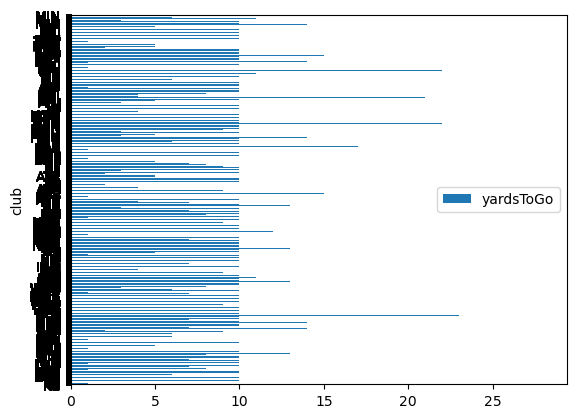

In [42]:
dataset.plot(x= 'club', y= 'yardsToGo', kind = 'barh')

In [43]:
dataset.loc[dataset.club == 'BAL', ['yardsToGo']].value_counts()

yardsToGo
10           882
1            321
4            206
2            181
5             86
7             62
3             59
6             49
11            30
15            30
dtype: int64

In [44]:
dataset['yardsToGo'].isnull().sum()

0

No missing data in our target variable is good.

In [52]:
missingdataset = pd.concat([dataset.isnull().sum(), 100 * dataset.isnull().mean()], axis = 1)
missingdataset.columns = ['count', '%']
missingdataset.sort_values(by = 'count', ascending = False). head(20)

,count,%
pff_missedTackle,59632,100.000000
tackle,59632,100.000000
forcedFumble,59632,100.000000
assist,59632,100.000000
foulName2,59415,99.636101
foulNFLId2,59415,99.636101
foulNFLId1,56423,94.618661
foulName1,56423,94.618661
penaltyYards,56218,94.274886
event,54177,90.852227


There seems to be a lot of missing data for these coulmds, especially the first 10.

In [53]:
missing['%'].unique()

array([14.92537313, 13.43283582, 10.44776119,  8.95522388, 17.91044776,
       16.41791045, 11.94029851,  7.46268657,  5.97014925, 19.40298507,
       22.3880597 , 20.89552239])

In [54]:
missing['%'].value_counts()

17.910448    27197
14.925373    12355
19.402985     8394
16.417910     7575
13.432836     2651
11.940299      787
10.447761      400
8.955224       106
22.388060       86
20.895522       58
7.462687        20
5.970149         3
Name: %, dtype: int64

In [55]:
dataset.shape

(59632, 67)

## Taking a Look at the Foul coulmns

In [56]:
dataset['foulName1'].value_counts()

Offensive Holding                1161
Face Mask                         476
Defensive Offside                 258
Defensive Holding                 247
Ineligible Downfield Pass         213
Offensive Pass Interference       182
Illegal Contact                   159
Illegal Formation                 127
Low Block                          71
Unnecessary Roughness              69
Illegal Block Above the Waist      59
Illegal Shift                      58
Roughing the Passer                33
Chop Block                         27
Illegal Use of Hands               26
Tripping                           24
Taunting                           19
Name: foulName1, dtype: int64

In [57]:
dataset['foulName2'].value_counts()

Offensive Holding              101
Unnecessary Roughness           53
Offensive Pass Interference     35
Defensive Pass Interference     14
Illegal Use of Hands            14
Name: foulName2, dtype: int64